# Data Processing with Python
## Midterm
#### Kevin Tran Nguyen, April 6th, 2021

In [445]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import time
import matplotlib.pyplot as plt

In [46]:
login = {'cuni':'32714879'}
r = requests.post("https://ies-midterm.soulution.rocks/login", json = login)
print(r.ok)
print(r.text)
output = r.json()

True
{"data": {"personal_code": "a53c9034", "dataset_ids": ["503981c9e8", "2d1aef30ed", "11f651d1ee", "f45ec2e9fc"]}, "message": "Hello, Tran Nguyen Thai Nhat Phi, Bc! Good luck with the midterm. GET your data set from /data/file_id endpoint; use the codes you received in the data response as the file_id parameter! Print the personal code in your notebook."}


In [47]:
print(output['data']['personal_code'])
code_list = output['data']['dataset_ids']
code_list

a53c9034


['503981c9e8', '2d1aef30ed', '11f651d1ee', 'f45ec2e9fc']

In [79]:
try
    except all([dt.ok for dt in datasets]):
        datasets = [requests.get(f"https://ies-midterm.soulution.rocks/data/{dataid}") for dataid in code_list]
    finally:
        datasets = [requests.get(f"https://ies-midterm.soulution.rocks/data/{dataid}") for dataid in code_list]

SyntaxError: invalid syntax (<ipython-input-79-a3d325a207bd>, line 1)

In [87]:
datasets = []
for dt in code_list:
    status_codes = [requests.get(f"https://ies-midterm.soulution.rocks/data/{dataid}") for dataid in code_list]
    if all(status_codes):
        datasets.append(requests.get(f"https://ies-midterm.soulution.rocks/data/{code_list}").json)

In [466]:
try:
    datasets = [requests.get(f"https://ies-midterm.soulution.rocks/data/{dataid}") for dataid in code_list]
except requests.exceptions.RequestException as e:
    print('Error')

In [159]:
def getDatasets(codes):
    r = [requests.get(f"https://ies-midterm.soulution.rocks/data/{dataid}") for dataid in codes]
    if any([req.ok for req in r]):
        return print('Error Occured, Retry')
    else:
        return [data.json() for data in r]

In [177]:
datasets

[<Response [503]>, <Response [200]>, <Response [503]>, <Response [503]>]

In [117]:
#data_retrieved = [dt.json() for dt in datasets]
data_retrieved

# Part TWO

In [217]:
dataseries = []
for dt in data_retrieved:
    dataseries.append(pd.DataFrame(dt['data']['data']).assign(company = dt['data']['company']))

In [446]:
#the time series should be from 2019-01-02 to 2020-11-20. Is it the case in your sample?
[dt['Date'] for dt in dataseries]

[0      2019-01-02
 1      2019-01-03
 2      2019-01-04
 3      2019-01-07
 4      2019-01-08
           ...    
 474    2020-11-17
 475    2020-11-18
 476    2020-11-19
 477    2020-11-20
 478              
 Name: Date, Length: 479, dtype: object,
 0      2019-01-02
 1      2019-01-03
 2      2019-01-04
 3      2019-01-07
 4      2019-01-08
           ...    
 474    2020-11-17
 475    2020-11-18
 476    2020-11-19
 477    2020-11-20
 478              
 Name: Date, Length: 479, dtype: object,
 0      2019-01-02
 1      2019-01-03
 2      2019-01-04
 3      2019-01-07
 4      2019-01-08
           ...    
 474    2020-11-17
 475    2020-11-18
 476    2020-11-19
 477    2020-11-20
 478              
 Name: Date, Length: 479, dtype: object,
 0      2019-01-02
 1      2019-01-03
 2      2019-01-04
 3      2019-01-07
 4      2019-01-08
           ...    
 474    2020-11-17
 475    2020-11-18
 476    2020-11-19
 477    2020-11-20
 478              
 Name: Date, Length: 479, dtype: object]

In [273]:
#what is the highest and lowest Adj Close price the company recorded?
[print(f'Company {dt.company[0]} \n \nMaximum is: {pd.to_numeric(dt["Adj.Close"]).max()} \nMinimum is: {pd.to_numeric(dt["Adj.Close"]).min()}\n') for dt in dataseries]

Company WPP 
 
Maximum is: 65.34528350830078 
Minimum is: 25.797861099243164

Company RIO 
 
Maximum is: 65.43000030517578 
Minimum is: 35.546142578125

Company MNG 
 
Maximum is: 45.31999969482422 
Minimum is: 14.93000030517578

Company AAL 
 
Maximum is: 36.44142532348633 
Minimum is: 9.039999961853027



[None, None, None, None]

In [483]:
#what day was the highest number of shares traded
#dataseries[0]['Volume'] = pd.to_numeric(dataseries[0]['Volume']
dataseries[0].iloc[[dataseries[0]['Volume'].idxmax()]]
maxvol = []
maxvol.append([dataseries[i].iloc[[pd.to_numeric(dataseries[i]['Volume']).idxmax()]] for i in range(4)])                             
maxvol

[[           Date                Open               High                Low  \
  328  2020-04-22  33.150001525878906  33.63999938964844  32.79999923706055   
  
                   Close  Adj.Close     Volume company  
  328  33.40999984741211  31.059694  2324200.0     WPP  ,
            Date               Open               High                Low  \
  52  2019-03-19  58.04999923706055  58.08000183105469  56.06999969482422   
  
                  Close          Adj.Close   Volume company  
  52  56.52000045776367  50.41569900512695  7251400     RIO  ,
           Date                Open                High                 Low  \
  0  2019-01-02  35.630001068115234  36.810001373291016  34.709999084472656   
  
                 Close          Adj.Close Volume company  
  0  36.65999984741211  36.65999984741211      0     MNG  ,
             Date   Open                High                 Low  \
  359  2020-06-05  21.25  22.799999237060547  17.799999237060547   
  
                   Clos

In [358]:
#what is the total of shares traded
dataseries_concat = pd.concat([dt for dt in dataseries])
dataseries_concat
maxvols = [dataseries[0]['Volume'].sum(),
pd.to_numeric(dataseries[1]['Volume']).sum(),
pd.to_numeric(dataseries[2]['Volume']).sum(),
pd.to_numeric(dataseries[3]['Volume']).sum()]

<AxesSubplot:>

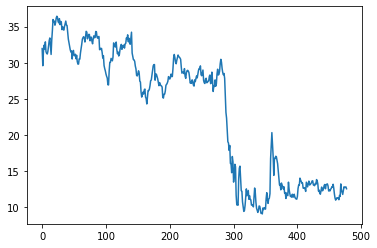

In [363]:
#for the company with the highest volume of shares traded over the whole period, plot their share price over time
pd.to_numeric(dataseries[pd.Series(maxvols).idxmax()]['Adj.Close']).plot()

In [467]:
#when did the company record the highest gain and highest loss for the day? (logarithmic loss)
logretsmax = [np.log(pd.to_numeric(dataseries[i]['Close'])/pd.to_numeric(dataseries[i]['Open'])).idxmax() for i in range(4)]
logretsmin = [np.log(pd.to_numeric(dataseries[i]['Close'])/pd.to_numeric(dataseries[i]['Open'])).idxmin() for i in range(4)]
print([logretsmax,logretsmin])

[[365, 308, 301, 358], [318, 306, 297, 304]]


<AxesSubplot:>

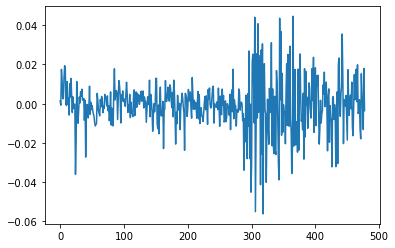

In [387]:
#plot the log returns for the company that has the largest difference between opening and closing price. What day and what company did it occur at?
np.log(pd.to_numeric(dataseries[pd.Series(logretsmax).idxmax()]['Close'])/pd.to_numeric(dataseries[pd.Series(logretsmax).idxmax()]['Open'])).plot()

In [479]:
pd.concat([dataseries[i]['Adj.Close'].rolling(10).std() for i in range(4)], axis = 1).drop([0,1,2,3,4,5,6,7,8,478])

,Adj.Close,Adj.Close,Adj.Close,Adj.Close
9,1.142277,1.228630,1.941181,0.875448
10,0.992925,1.064103,1.698326,0.899025
11,0.623388,0.546522,1.232263,0.658807
12,0.424154,0.486005,0.900351,0.779648
13,0.341872,0.404606,0.679134,0.774633
...,...,...,...,...
473,3.629739,2.011050,1.250222,0.692908
474,3.448956,1.940385,1.378207,0.676793
475,2.785075,1.402214,1.312242,0.576319
476,2.285092,0.807644,1.235675,0.539955


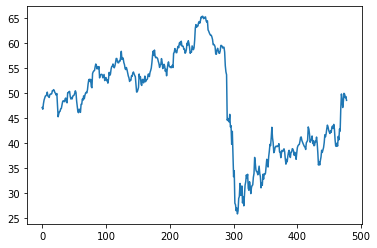

In [444]:
adjprices = pd.concat([dataseries[i]['Adj.Close'] for i in range(4)], axis = 1)
adjprices.columns = ['WPP','RIO','MNG','AAL']
plt.plot(adjprices['WPP'])
#plt.plot(adjprices['RIO'])
#plt.plot(adjprices['MNG'])
#plt.plot(adjprices['AAL'])

Below is converison of the dataframe columns into numerics, which was achieved too late though....

In [465]:
dataseries_numeric = [dataseries[i][list(dataseries[i].columns[1:7])].apply(pd.to_numeric) for i in range(4)]